In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import imsave
import skimage as sk
import skimage.io as skio
from skimage.color import rgb2gray
from scipy import signal
import scipy.ndimage as ndimage


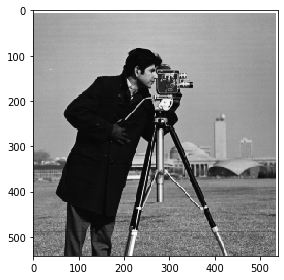

In [2]:
# Part 1 Fun with Filters
#1.1
imname = 'exampls/cameraman.png'
im = skio.imread(imname)

skio.imshow(im)
skio.show()

Lossy conversion from float64 to uint8. Range [-0.8235294117647058, 1.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.6823529411764706, 1.0]. Convert image to uint8 prior to saving to suppress this warning.


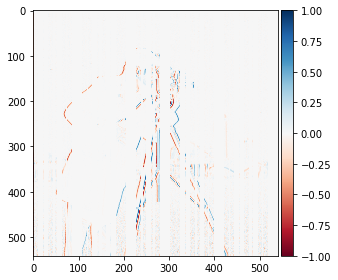

In [3]:
im = sk.img_as_float(im) 
im = rgb2gray(im)
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])

grad_x = signal.convolve2d(im, dx, mode='same')
grad_y = signal.convolve2d(im, dy, mode='same')

fname = 'output/dx_cameraman.jpg'
skio.imsave(fname, grad_x)
fname = 'output/dy_cameraman.jpg'
skio.imsave(fname, grad_y)

skio.imshow(grad_x)
skio.show()

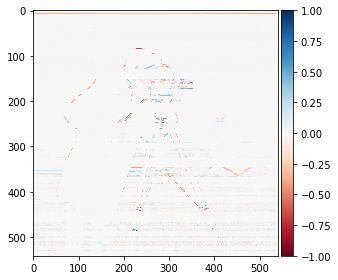

In [4]:
skio.imshow(grad_y)
skio.show()

C:\Users\Michelle Fong\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


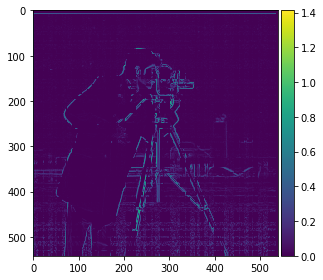

In [5]:
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

fname = 'output/partial_cameraman.jpg'
imsave(fname, grad_mag, cmap="Greys")
skio.imshow(grad_mag)
skio.show()


Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


0.25


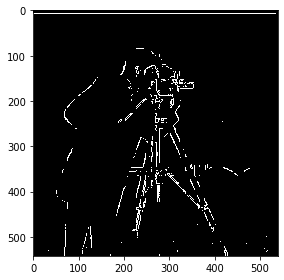

In [6]:
thresh = .25
print(thresh)
binary = grad_mag > thresh
binary = sk.img_as_uint(binary)

fname = 'output/binary_cameraman.jpg'
skio.imsave(fname, binary)
skio.imshow(binary)
skio.show()

In [7]:
# 1.2
# took from stack overflow
from math import pi, sqrt, exp

def gauss(n=11,sigma=1):
    r = range(-int(n/2),int(n/2)+1)
    return [1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2)) for x in r]

[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]


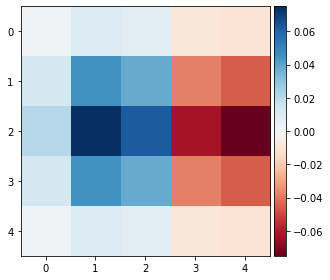

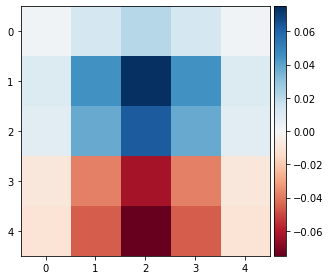

In [8]:
gaussian = np.array(gauss(5, 1))
print(gaussian)
gaussian = np.outer(gaussian, gaussian.T)
#gauss_im = ndimage.gaussian_filter(im, sigma=2)
#skio.imshow(gauss_im)
#skio.show()

gauss_x = signal.convolve2d(gaussian, dx, mode='same')
skio.imshow(gauss_x)
skio.show()
gauss_y = signal.convolve2d(gaussian, dy, mode='same')
skio.imshow(gauss_y)
skio.show()

Lossy conversion from float64 to uint8. Range [-0.2704071725779549, 0.3952982069557004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.22907946555546116, 0.3952982069557004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


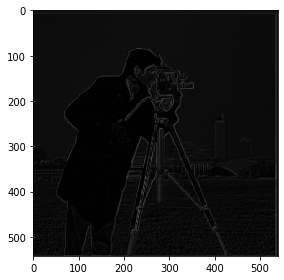

In [9]:
grad_x = signal.convolve2d(im, gauss_x, mode='same')

grad_y = signal.convolve2d(im, gauss_y, mode='same')
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

fname = 'output/dx_gauss.jpg'
skio.imsave(fname, grad_x)
fname = 'output/dy_gauss.jpg'
skio.imsave(fname, grad_y)
fname = 'output/grad_gauss.jpg'
skio.imsave(fname, grad_mag)


skio.imshow(grad_mag)
skio.show()

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


0.1


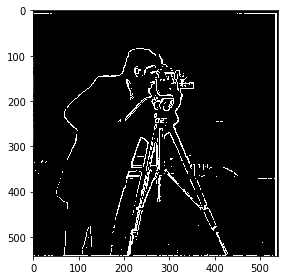

In [10]:
thresh = .1
print(thresh)
binary = grad_mag > thresh
binary = sk.img_as_uint(binary)

fname = 'output/binary_cameraman_gaussian.jpg'
skio.imsave(fname, binary)
skio.imshow(binary)
skio.show()

(2849, 3799)


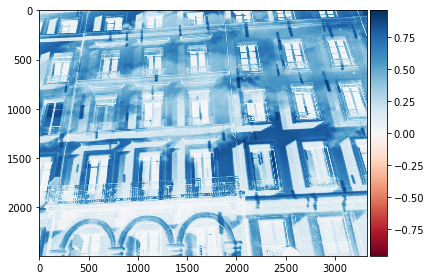

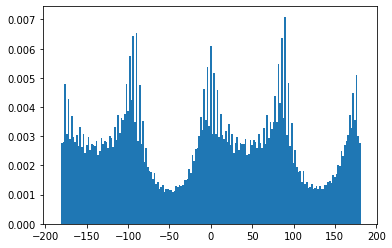

In [94]:
#1.3 Image Straightening 
imname = 'exampls/facade.jpg'
im = skio.imread(imname)
im = rgb2gray(im)

#angles = [-10, -8, -6, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6, 8, 10]
angles = [0]
count_angles = []
for angle in angles:
    rotated = ndimage.interpolation.rotate(im, angle)
    print(rotated.shape)
    H, W = rotated.shape
    rotated = rotated[int(H/16) + int(np.abs(angle)*H/100):int(15*H/16) - int(np.abs(angle)*H/100), int(W/16) + int(np.abs(angle)*W/100):int(15*W/16) - int(np.abs(angle)*W/100)]
    #rotated = rotated[500: -500, 500: -500]
    skio.imshow(rotated)
    skio.show()
    
    # TODO: Compute the gradient angle of the edges in the image
    partial_x = signal.fftconvolve(rotated, dx, mode='same')
    partial_y = signal.fftconvolve(rotated, dy, mode='same')
    grad_mag = np.sqrt(partial_x**2 + partial_y**2)
    #gradient_angle.append(np.arctan2(partial_y, partial_x))
    #angles = np.degrees(np.arctan2(partial_y, partial_x))
    grad_angle = []
    for i in range(len(grad_mag)):
        for j in range(len(grad_mag[0])):
            if grad_mag[i][j] > 0.05:
                grad_angle += [np.arctan2(partial_y[i][j], partial_x[i][j])]
    to_degree = np.degrees(grad_angle)
    count_angles.append(to_degree)
    flat = np.ndarray.flatten(to_degree)
    
    pyplot.hist(flat, bins=np.arange(-185, 185, 2), density=True)
    pyplot.show()

In [21]:
best_angle = 0
best_sum = 0
for i in range(0, len(count_angles)):
    sum_angles = np.sum(np.isclose(count_angles[i], -90, .1)) + np.sum(np.isclose(count_angles[i], -180, .1)) + np.sum(np.isclose(count_angles[i], 180, .1)) + np.sum(np.isclose(count_angles[i], 0, .1)) + np.sum(np.isclose(count_angles[i], 90, .1)) + np.sum(np.isclose(count_angles[i], -270, .1)) + np.sum(np.isclose(count_angles[i], 270, .1))
    
    print(sum_angles)
    if sum_angles > best_sum:
        best_angle = angles[i]
        best_sum = sum_angles
print(best_angle)


47055
50151
53015
55662
56554
57417
58307
59984
58475
56982
56361
54982
52284
49143
45755
0


In [40]:
imname = 'exampls/inception.jpg'
im = skio.imread(imname)
#im = rgb2gray(im)

angles = [-10]
count_angles = []
for angle in angles:
    rotated = ndimage.interpolation.rotate(im, angle)
    print(rotated.shape)
    H, W, _ = rotated.shape
    rotated = rotated[int(H/16) + int(np.abs(angle)*H/100):int(15*H/16) - int(np.abs(angle)*H/100), int(W/16) + int(np.abs(angle)*W/100):int(15*W/16) - int(np.abs(angle)*W/100)]
    fname = 'output/straight_inception.jpg'
    imsave(fname, rotated)

(1244, 1651, 3)


In [ ]:
#2.1 Image "Sharpening"
imname = 'exampls/taj.jpg'
im = skio.imread(imname)
im = rgb2gray(im)

gauss_im = signal.fftconvolve(im, gaussian, mode='same')
skio.imshow(gauss_im)
skio.show()
fname = 'output/taj_blur.jpg'
imsave(fname, gauss_im, cmap="gray")
sharp = im + .5* (im - gauss_im)
sharp = np.clip(sharp, 0, 1)
skio.imshow(sharp)
skio.show()
fname = 'output/taj_sharp.jpg'
imsave(fname, sharp, cmap="gray")

(1333, 2000, 3)


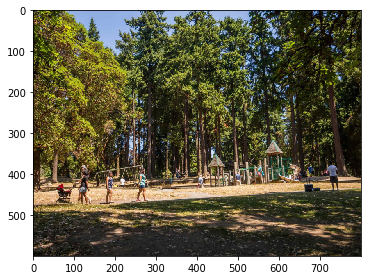

In [19]:
# resize big image

from skimage.transform import resize
imname = 'exampls/park.jpg'
im = skio.imread(imname)
#im = rgb2gray(im)
print(im.shape)
resized_im = resize(im, (600, 800))
skio.imshow(resized_im)
skio.show()
fname = 'exampls/park.jpg'
imsave(fname, resized_im)

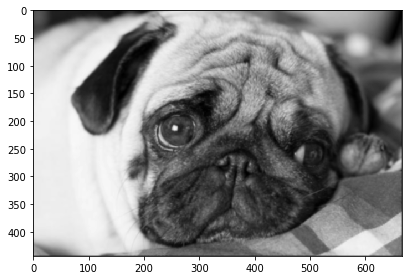

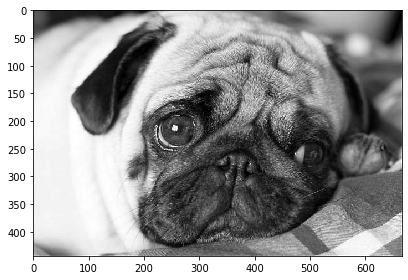

In [22]:
imname = 'exampls/pug.jpg'
im = skio.imread(imname)
im = rgb2gray(im)

gauss_im = signal.fftconvolve(im, gaussian, mode='same')
skio.imshow(gauss_im)
skio.show()
fname = 'output/pug_blur.jpg'
imsave(fname, gauss_im, cmap="gray")
sharp = im + .5* (im - gauss_im)
sharp = np.clip(sharp, 0, 1)
skio.imshow(sharp)
skio.show()
#fname = 'output/pug_sharp.jpg'
#imsave(fname, sharp, cmap="gray")

In [18]:
backend = pyplot.get_backend()

In [19]:
#2.2 Hybrid Images

import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as sktr

matplotlib.use('TkAgg')

def get_points(im1, im2):
    print('Please select 2 points in each image for alignment.')
    plt.imshow(im1)
    p1, p2 = plt.ginput(2)
    plt.close()
    plt.imshow(im2)
    p3, p4 = plt.ginput(2)
    plt.close()
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale, multichannel=True)
    else:
        im2 = sktr.rescale(im2, 1./dscale, multichannel=True)
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2


if __name__ == "__main__":
    # 1. load the image
    # 2. align the two images by calling align_images
    # Now you are ready to write your own code for creating hybrid images!
    pass


Please select 2 points in each image for alignment.


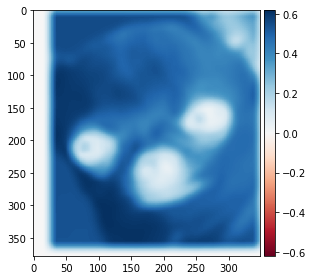

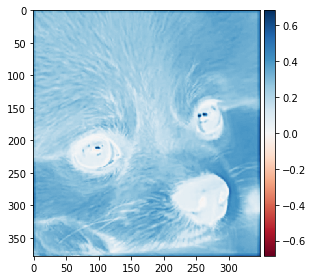

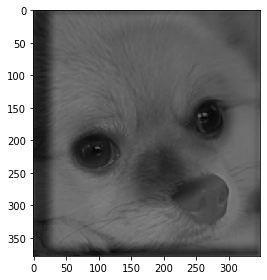

In [20]:
import matplotlib.pyplot as plt

# First load images

# high sf
#im1 = plt.imread('exampls/hybrid_python/DerekPicture.jpg')/255.
im1 = plt.imread('exampls/pom.jpg')
# low sf
#im2 = plt.imread('exampls/hybrid_python/nutmeg.jpg')/255
im2 = plt.imread('exampls/chihuahua.jpg')

# Next align images (this code is provided, but may be improved)
im2_aligned, im1_aligned = align_images(im1, im2)

matplotlib.use(backend)

hybrid1 = []
hybrid2 = []

## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

def hybrid_image(image2, image1, sig1, sig2):
    global hybrid1
    global hybrid2
    gauss_1 = np.array(gauss(20, sig1))
    gauss_1 = np.outer(gauss_1, gauss_1)
    
    #low pass filter one
    image1 = rgb2gray(image1)
    low_im1 = signal.fftconvolve(image1, gauss_1, mode='same')
    hybrid1 = np.matrix.copy(low_im1)
    skio.imshow(low_im1)
    skio.show()
    
    gauss_2 = np.array(gauss(10, sig2))
    gauss_2 = np.outer(gauss_2, gauss_2)
    
    #high pass filter the other
    image2 = rgb2gray(image2)
    gauss_im2 = signal.fftconvolve(image2, gauss_2, mode='same')
    high_im2 = image2 - gauss_im2
    hybrid2 = np.matrix.copy(low_im1)
    skio.imshow(high_im2)
    skio.show()
    
    return (low_im1 + high_im2) / 2

sigma1 = 8
sigma2 = 5

hybrid = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = np.clip(hybrid, 0 , 1)
skio.imshow(hybrid)
skio.show()

#def pyramids(image, levels):
#    return 
    
## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
N = 5 # suggested number of pyramid levels (your choice)
#pyramids(hybrid, N)

In [21]:
fname = 'output/pomhuahua.jpg'
imsave(fname, rgb2gray(hybrid), cmap="gray")

In [ ]:

skio.imsave('output/input1_f.jpg', np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
skio.imsave('output/input2_f.jpg', np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
print(np.array(im2).shape)
print(np.array(hybrid1).shape)
print(hybrid1)
skio.imsave('output/filter1_f.jpg', np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid1)))))
skio.imsave('output/filter2_f.jpg', np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid2)))))
skio.imsave('output/hybrid_f.jpg', np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid)))))


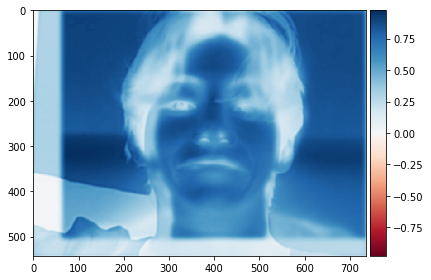

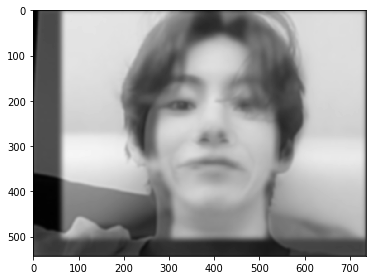

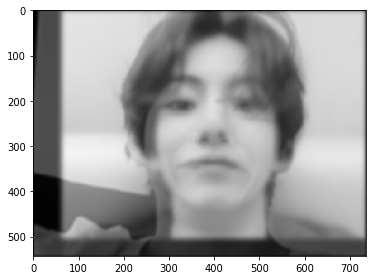

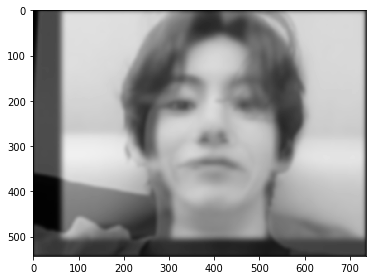

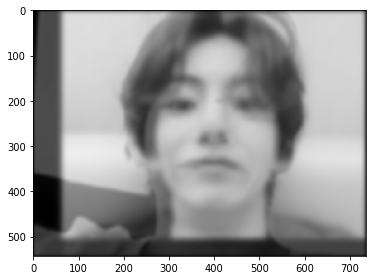

In [83]:
#2.3 Gaussian and Laplacian Stacks
im = pyplot.imread('output/hybrid_taekook.jpg')
im = rgb2gray(im)

gaussian = np.array(gauss(10, 2))
gaussian = np.outer(gaussian, gaussian)
g_stack = []
for i in range(5):    
    im = signal.fftconvolve(im, gaussian, mode='same')
    g_stack.append(np.matrix.copy(im))
    skio.imshow(im)
    skio.show()
    fname = 'output/tk_stack' + str(i) + '.jpg'
    imsave(fname, im, cmap="gray")

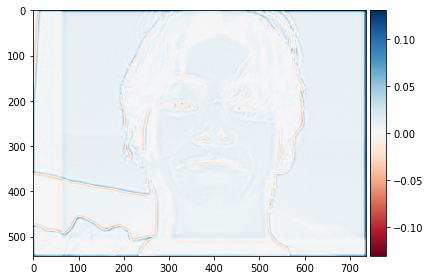

In [84]:
freq = g_stack[0] - g_stack[1]
skio.imshow(freq)
skio.show()

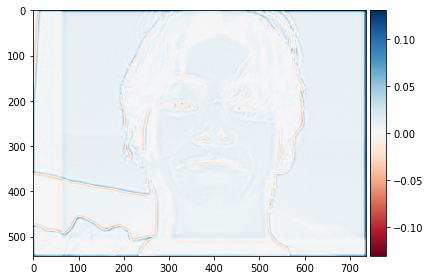

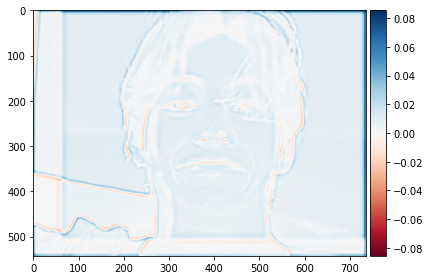

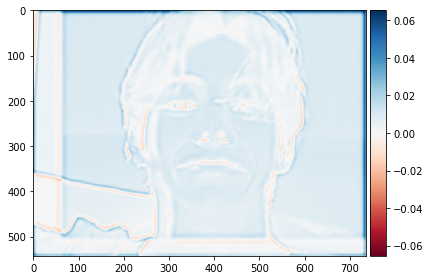

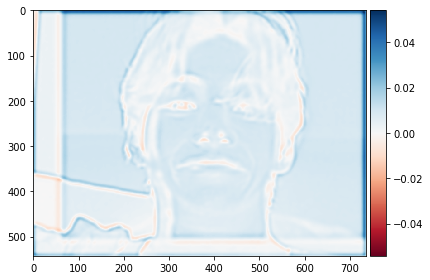

In [85]:
l_stack = []
for i in range(0, len(g_stack) - 1):
    pancake = g_stack[i] - g_stack[i + 1]
    l_stack.append(np.matrix.copy(pancake))
    #pancake = np.clip(pancake, 0, 1)
    skio.imshow(pancake)
    skio.show()
    fname = 'output/tk_laplac' + str(i) + '.jpg'
    imsave(fname, pancake, cmap="Greys")

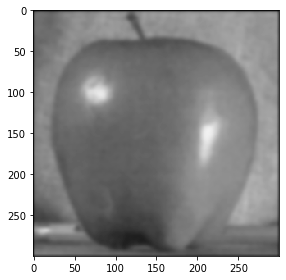

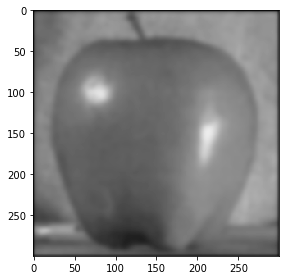

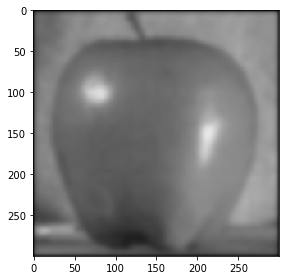

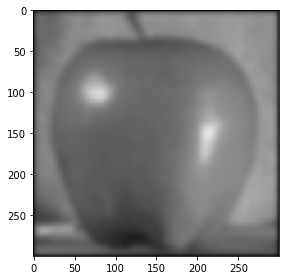

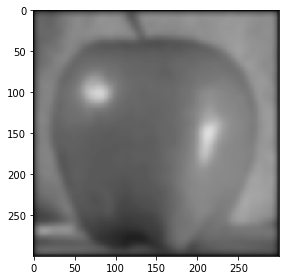

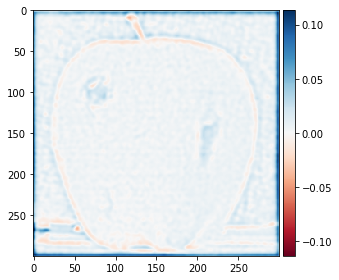

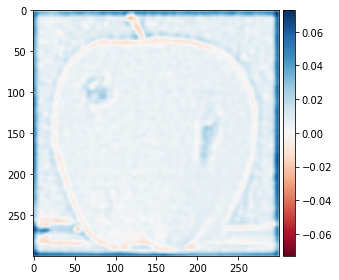

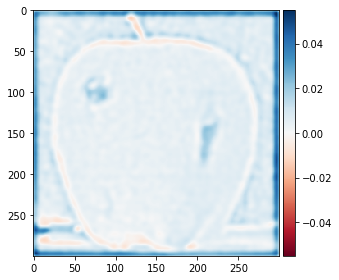

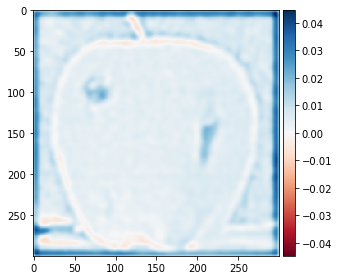

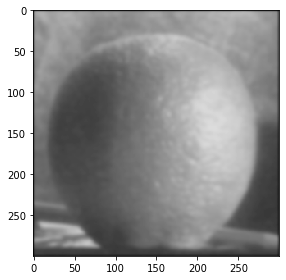

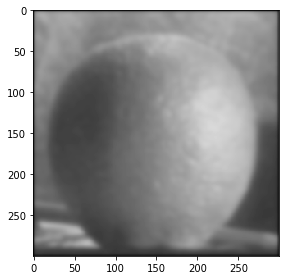

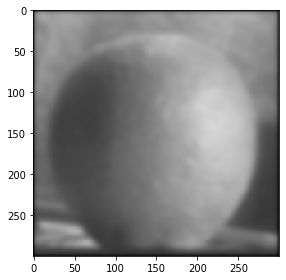

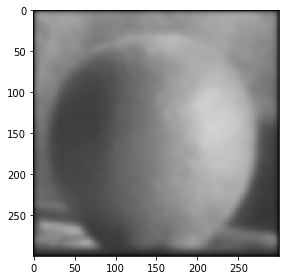

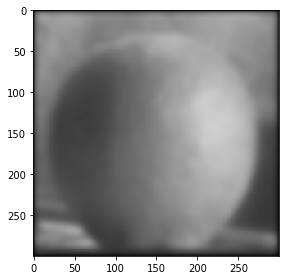

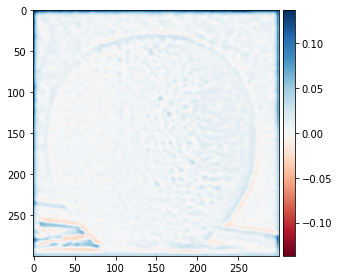

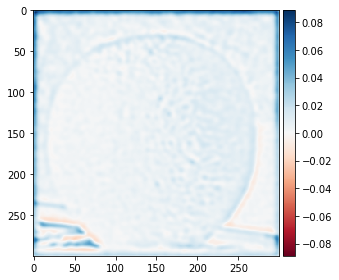

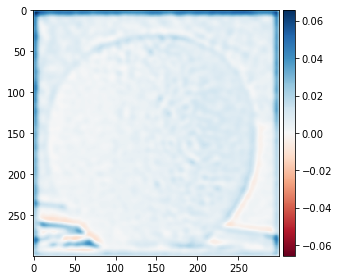

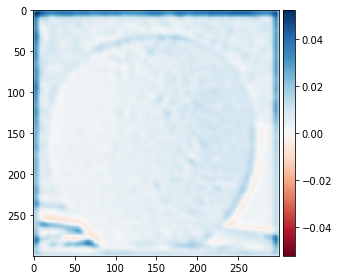

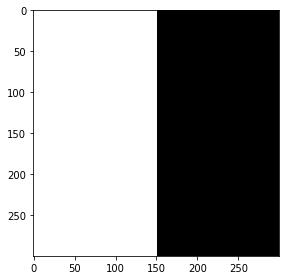

In [27]:
#2.4 Multiresolution Blending
apple = pyplot.imread('exampls/apple.jpeg')
apple = rgb2gray(apple)
orange = pyplot.imread('exampls/orange.jpeg')
orange = rgb2gray(orange)

gaussian = np.array(gauss(10, 2))
gaussian = np.outer(gaussian, gaussian)

g_apple = []
for i in range(5):    
    apple = signal.fftconvolve(apple, gaussian, mode='same')
    g_apple.append(np.matrix.copy(apple))
    skio.imshow(g_apple[i])
    skio.show()

l_apple = []
for i in range(0, len(g_apple) - 1):
    pancake = g_apple[i] - g_apple[i + 1]
    l_apple.append(np.matrix.copy(pancake))
    skio.imshow(pancake)
    skio.show()
    fname = 'output/ap_laplac' + str(i) + '.jpg'
    imsave(fname, pancake, cmap="Greys")
    
g_orange = []
for i in range(5):    
    orange = signal.fftconvolve(orange, gaussian, mode='same')
    g_orange.append(np.matrix.copy(orange))
    skio.imshow(orange)
    skio.show()
    
l_orange = []
for i in range(0, len(g_orange) - 1):
    pancake = g_orange[i] - g_orange[i + 1]
    l_orange.append(np.matrix.copy(pancake))
    skio.imshow(pancake)
    skio.show()
    fname = 'output/or_laplac' + str(i) + '.jpg'
    imsave(fname, pancake, cmap="Greys")
    
mask = np.ones(np.array(apple).shape)
for m in range(0, len(mask)):
    for i in range(0, len(mask[0])):
        if i > len(mask[0]) / 2:
            mask[m][i] = 0
#mask = pyplot.imread('exampls/mask.PNG')
#mask = rgb2gray(mask)
skio.imshow(mask)
skio.show()


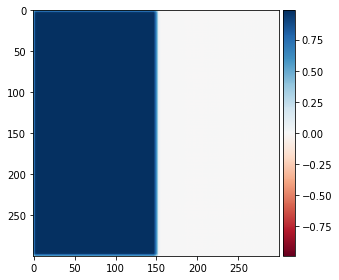

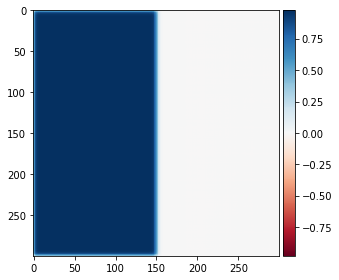

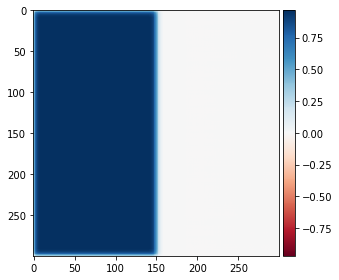

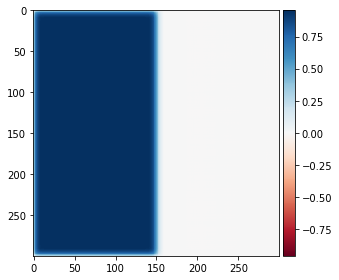

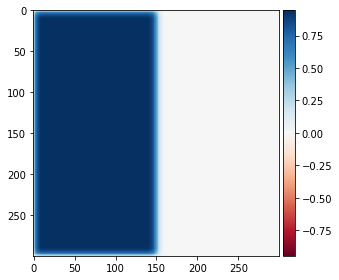

In [28]:
# step 1b
gr = mask
gr_stack = []
for i in range(5):    
    gr = signal.fftconvolve(gr, gaussian, mode='same')
    gr_stack.append(np.matrix.copy(gr))
    skio.imshow(gr_stack[i])
    skio.show()

(5, 300, 300)
(4, 300, 300)
(4, 300, 300)


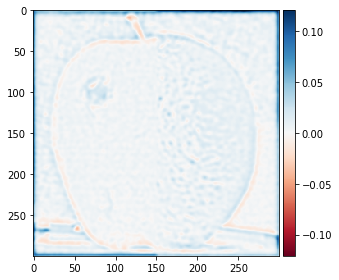

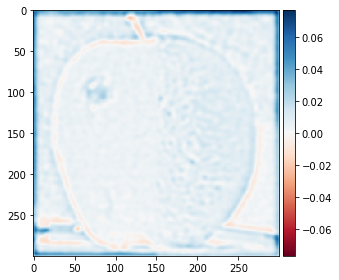

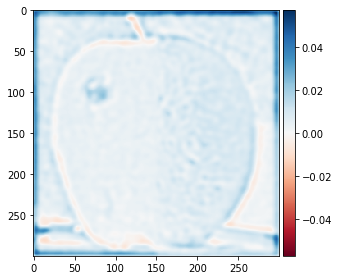

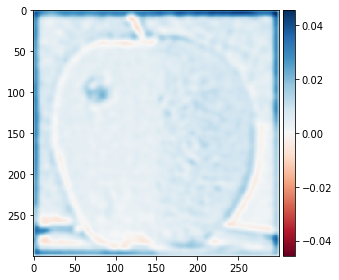

In [29]:
# step 2
ls = np.zeros(np.array(gr_stack).shape)
print(np.array(gr_stack).shape)
print(np.array(l_apple).shape)
print(np.array(l_orange).shape)
for layer in range(0, len(l_apple)):
    for i in range(0, len(l_apple[0])):
        for j in range(0, len(l_apple[0][0])):
            ls[layer][i][j] = gr_stack[layer][i][j] * l_apple[layer][i][j] + (1 - gr_stack[layer][i][j]) * l_orange[layer][i][j]
    skio.imshow(ls[layer])
    skio.show()
    fname = 'output/orap_laplac' + str(layer) + '.jpg'
    imsave(fname, ls[layer], cmap="Greys")        

In [ ]:
# step 3
splined = gr_stack[len(gr_stack) - 1] * g_apple[len(gr_stack) - 1] + (1 - gr_stack[len(gr_stack) - 1]) * g_orange[len(gr_stack) - 1]
for layer in range(0, len(ls)):
    splined += ls[layer]

skio.imshow(splined)
skio.show()

In [ ]:
fname = 'output/oraple.jpg'
imsave(fname, splined, cmap="gray")

In [ ]:
#irregular mask
